In [134]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

#### Quick data preview

In [135]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


#### K-means clustering - Loan Amount, Applicant Income

In [136]:
X = data[['ApplicantIncome', 'LoanAmount']]
k = 3
clusters = []
for idx in range(k):
    center = X.sample(n=1, replace=False).to_numpy()
    cluster = {
        'center': center[0],
        'points': []
    }
    clusters += [cluster]
clusters

[{'center': array([2750.,  115.]), 'points': []},
 {'center': array([2875.,  105.]), 'points': []},
 {'center': array([1538.,   30.]), 'points': []}]

C:\Users\User\AppData\Local\Temp\ipykernel_12768\588086596.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


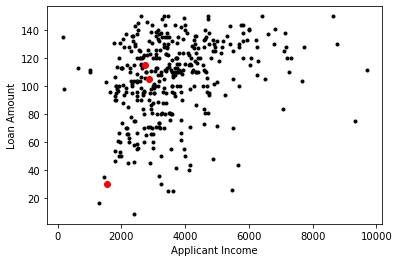

In [137]:
%matplotlib inline
fig, ax = plt.subplots()
ax.set_xlabel('Applicant Income')
ax.set_ylabel('Loan Amount')
ax.scatter(data['ApplicantIncome'], data['LoanAmount'], marker='.', c='black')
for cluster in clusters:
    ax.scatter(cluster['center'][0], cluster['center'][1], marker='o', c='red')
fig.show()

In [138]:
import math
def euclidean_distance(A, B):
    return math.sqrt(math.pow(A[0]-B[0],2) + math.pow(A[1]-B[1],2))

def average_point(points):
    n = len(points)
    x_avg = sum([p[0] for p in points]) / n
    y_avg = sum([p[1] for p in points]) / n
    return [x_avg, y_avg]

In [139]:
X_np = X.to_numpy()
distance_fn = euclidean_distance
for x in X_np:
    closest_cluster = clusters[0]
    min_distance = distance_fn(x, closest_cluster['center'])
    for cluster_idx, cluster in enumerate(clusters):
        distance = distance_fn(x, cluster['center'])
        if distance < min_distance:
            min_distance = distance
            closest_cluster = cluster
    closest_cluster['points'] += [x]
    closest_cluster['center'] = average_point(closest_cluster['points'])

C:\Users\User\AppData\Local\Temp\ipykernel_12768\2716938996.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


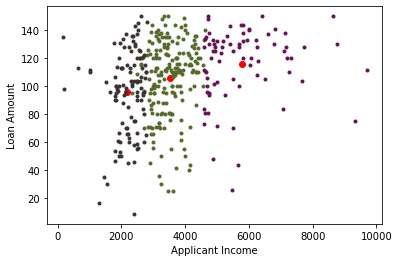

In [140]:
colors = [[[random.random(), random.random(), random.random()]] for _ in range(k)]
%matplotlib inline
fig, ax = plt.subplots()
ax.set_xlabel('Applicant Income')
ax.set_ylabel('Loan Amount')
for cluster_idx, cluster in enumerate(clusters):
    ax.scatter(cluster['center'][0], cluster['center'][1], marker='o', c='red')
    for point in cluster['points']:
        ax.scatter(point[0], point[1], marker='.', c=colors[cluster_idx])
fig.show()